[View in Colaboratory](https://colab.research.google.com/github/RaulMedeiros/test_cpp_cuda_codes/blob/master/Train_a_simple_CNN_on_the_MNIST_dataset.ipynb)

# Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).

https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

### Configuration

In [10]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

### Load Data

In [11]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

###Plots a random sample from the training dataset.

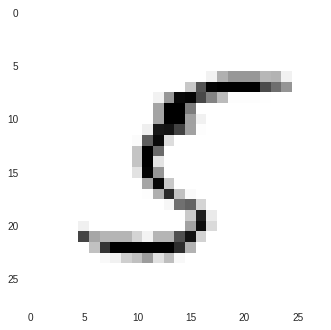

In [13]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(x_train[np.random.randint(len(x_train))])
plt.grid(False)
plt.show()

### Format images to the order requested by Tensflow backgroud API.

In [8]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
input_shape

(28, 28, 1)

### Normalize MNIST images between 0 and 1.

In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### Convert labes to One-Hot Format.

In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### Build Deep Model architecture.

In [5]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


### Set the training configurations: loss (objetctive func.), optimization strategy and the evaluation metric.

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


### Train the model using GPU.

In [7]:
%%time
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 11s 187us/step - loss: 0.0658 - acc: 0.9804 - val_loss: 0.0354 - val_acc: 0.9887
Epoch 2/12
60000/60000 [==============================] - 11s 178us/step - loss: 0.0514 - acc: 0.9848 - val_loss: 0.0310 - val_acc: 0.9892
Epoch 3/12
24576/60000 [===========>..................] - ETA: 6s - loss: 0.0460 - acc: 0.9860

60000/60000 [==============================] - 11s 178us/step - loss: 0.0465 - acc: 0.9859 - val_loss: 0.0275 - val_acc: 0.9905
Epoch 4/12
60000/60000 [==============================] - 11s 179us/step - loss: 0.0413 - acc: 0.9879 - val_loss: 0.0280 - val_acc: 0.9901
Epoch 5/12
51712/60000 [========================>.....] - ETA: 1s - loss: 0.0352 - acc: 0.9892

60000/60000 [==============================] - 11s 179us/step - loss: 0.0364 - acc: 0.9890 - val_loss: 0.0281 - val_acc: 0.9907
Epoch 6/12
60000/60000 [==============================] - 11s 180us/step - loss: 0.0333 - acc: 0.9899 - val_loss: 0.0268 - val_acc: 0.9911
Epoch 7/12
60000/60000 [==============================] - 11s 179us/step - loss: 0.0325 - acc: 0.9902 - val_loss: 0.0280 - val_acc: 0.9907
Epoch 8/12
  512/60000 [..............................] - ETA: 10s - loss: 0.0258 - acc: 0.9883

60000/60000 [==============================] - 11s 179us/step - loss: 0.0304 - acc: 0.9906 - val_loss: 0.0280 - val_acc: 0.9908
Epoch 9/12
60000/60000 [==============================] - 11s 179us/step - loss: 0.0281 - acc: 0.9912 - val_loss: 0.0306 - val_acc: 0.9915
Epoch 10/12
47744/60000 [======================>.......] - ETA: 2s - loss: 0.0263 - acc: 0.9919

60000/60000 [==============================] - 11s 179us/step - loss: 0.0264 - acc: 0.9919 - val_loss: 0.0307 - val_acc: 0.9914
Epoch 11/12
60000/60000 [==============================] - 11s 179us/step - loss: 0.0244 - acc: 0.9925 - val_loss: 0.0300 - val_acc: 0.9906
Epoch 12/12
59392/60000 [============================>.] - ETA: 0s - loss: 0.0245 - acc: 0.9923

60000/60000 [==============================] - 11s 178us/step - loss: 0.0244 - acc: 0.9923 - val_loss: 0.0334 - val_acc: 0.9905
CPU times: user 1min 23s, sys: 44.6 s, total: 2min 7s
Wall time: 2min 9s


### Train the model using only CPU.

In [6]:
%%time
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 164s 3ms/step - loss: 0.2497 - acc: 0.9238 - val_loss: 0.0552 - val_acc: 0.9824
Epoch 2/12
14080/60000 [======>.......................] - ETA: 2:01 - loss: 0.0920 - acc: 0.9740

60000/60000 [==============================] - 162s 3ms/step - loss: 0.0860 - acc: 0.9746 - val_loss: 0.0412 - val_acc: 0.9864
Epoch 3/12
39808/60000 [==================>...........] - ETA: 51s - loss: 0.0675 - acc: 0.9797

60000/60000 [==============================] - 159s 3ms/step - loss: 0.0664 - acc: 0.9802 - val_loss: 0.0333 - val_acc: 0.9879
Epoch 4/12
49664/60000 [=======================>......] - ETA: 26s - loss: 0.0541 - acc: 0.9835

60000/60000 [==============================] - 161s 3ms/step - loss: 0.0546 - acc: 0.9832 - val_loss: 0.0311 - val_acc: 0.9901
Epoch 5/12
53376/60000 [=========================>....] - ETA: 16s - loss: 0.0455 - acc: 0.9861

60000/60000 [==============================] - 157s 3ms/step - loss: 0.0458 - acc: 0.9859 - val_loss: 0.0335 - val_acc: 0.9893
Epoch 6/12
54784/60000 [==========================>...] - ETA: 13s - loss: 0.0416 - acc: 0.9875

60000/60000 [==============================] - 157s 3ms/step - loss: 0.0411 - acc: 0.9877 - val_loss: 0.0258 - val_acc: 0.9910
Epoch 7/12
55296/60000 [==========================>...] - ETA: 11s - loss: 0.0371 - acc: 0.9887

60000/60000 [==============================] - 159s 3ms/step - loss: 0.0378 - acc: 0.9885 - val_loss: 0.0261 - val_acc: 0.9915
Epoch 8/12
55552/60000 [==========================>...] - ETA: 11s - loss: 0.0336 - acc: 0.9890

60000/60000 [==============================] - 161s 3ms/step - loss: 0.0336 - acc: 0.9892 - val_loss: 0.0300 - val_acc: 0.9907
Epoch 9/12
55552/60000 [==========================>...] - ETA: 11s - loss: 0.0319 - acc: 0.9901

60000/60000 [==============================] - 164s 3ms/step - loss: 0.0314 - acc: 0.9903 - val_loss: 0.0267 - val_acc: 0.9909
Epoch 10/12
55296/60000 [==========================>...] - ETA: 12s - loss: 0.0296 - acc: 0.9907

60000/60000 [==============================] - 166s 3ms/step - loss: 0.0299 - acc: 0.9906 - val_loss: 0.0292 - val_acc: 0.9915
Epoch 11/12
55296/60000 [==========================>...] - ETA: 12s - loss: 0.0284 - acc: 0.9913

60000/60000 [==============================] - 163s 3ms/step - loss: 0.0287 - acc: 0.9914 - val_loss: 0.0285 - val_acc: 0.9910
Epoch 12/12
55296/60000 [==========================>...] - ETA: 12s - loss: 0.0264 - acc: 0.9920

60000/60000 [==============================] - 161s 3ms/step - loss: 0.0264 - acc: 0.9920 - val_loss: 0.0269 - val_acc: 0.9914
CPU times: user 1h 1min 19s, sys: 51.6 s, total: 1h 2min 11s
Wall time: 32min 15s


### Compute Evaluation Metric

In [3]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])